In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

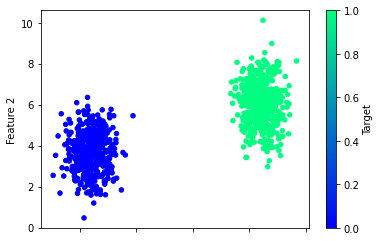

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [3]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [4]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [5]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [6]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [7]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [8]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [10]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 1s 4ms/step - loss: 1.0553 - accuracy: 0.1787
Epoch 2/100
24/24 [==============================] - 0s 4ms/step - loss: 1.0212 - accuracy: 0.1453
Epoch 3/100
24/24 [==============================] - 0s 4ms/step - loss: 0.9894 - accuracy: 0.1507
Epoch 4/100
24/24 [==============================] - 0s 4ms/step - loss: 0.9602 - accuracy: 0.1587
Epoch 5/100
24/24 [==============================] - 0s 4ms/step - loss: 0.9344 - accuracy: 0.1693
Epoch 6/100
24/24 [==============================] - 0s 4ms/step - loss: 0.9105 - accuracy: 0.1760
Epoch 7/100
24/24 [==============================] - 0s 4ms/step - loss: 0.8892 - accuracy: 0.1933
Epoch 8/100
24/24 [==============================] - 0s 3ms/step - loss: 0.8699 - accuracy: 0.2027
Epoch 9/100
24/24 [==============================] - 0s 3ms/step - loss: 0.8524 - accuracy: 0.2160
Epoch 10/100
24/24 [==============================] - 0s 3ms/step - loss: 0.8374 - accuracy: 0.2267
Epoch 11/

24/24 [==============================] - 0s 2ms/step - loss: 0.2818 - accuracy: 1.0000
Epoch 83/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2733 - accuracy: 1.0000
Epoch 84/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2652 - accuracy: 1.0000
Epoch 85/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2575 - accuracy: 1.0000
Epoch 86/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2501 - accuracy: 1.0000
Epoch 87/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2431 - accuracy: 1.0000
Epoch 88/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2364 - accuracy: 1.0000
Epoch 89/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2300 - accuracy: 1.0000
Epoch 90/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2239 - accuracy: 1.0000
Epoch 91/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2181 - accuracy: 1.0000
Epoch 92/100


<AxesSubplot:>

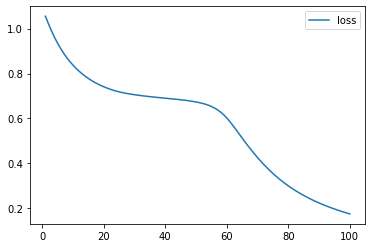

In [11]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")


<AxesSubplot:>

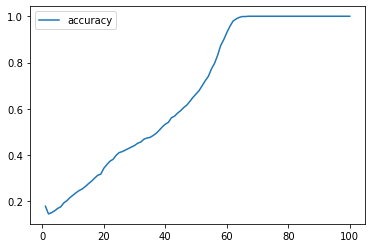

In [12]:
# Plot the accuracy
history_df.plot(y="accuracy")


In [13]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


8/8 - 0s - loss: 0.1782 - accuracy: 1.0000
Loss: 0.17821748554706573, Accuracy: 1.0


In [14]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")


array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]], dtype=int32)

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

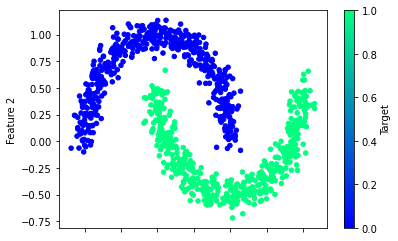

In [15]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [16]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [17]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6139 - accuracy: 0.6560
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 0.5880 - accuracy: 0.6640
Epoch 3/100
24/24 [==============================] - 0s 3ms/step - loss: 0.5647 - accuracy: 0.6787
Epoch 4/100
24/24 [==============================] - 0s 3ms/step - loss: 0.5448 - accuracy: 0.6947
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 0.5294 - accuracy: 0.7013
Epoch 6/100
24/24 [==============================] - 0s 3ms/step - loss: 0.5161 - accuracy: 0.7133
Epoch 7/100
24/24 [==============================] - 0s 3ms/step - loss: 0.5049 - accuracy: 0.7253
Epoch 8/100
24/24 [==============================] - 0s 3ms/step - loss: 0.4951 - accuracy: 0.7333
Epoch 9/100
24/24 [==============================] - 0s 3ms/step - loss: 0.4863 - accuracy: 0.7373
Epoch 10/100
24/24 [==============================] - 0s 3ms/step - loss: 0.4781 - accuracy: 0.7440
Epoch 11/

24/24 [==============================] - 0s 7ms/step - loss: 0.2817 - accuracy: 0.8920
Epoch 83/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2812 - accuracy: 0.8920
Epoch 84/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2807 - accuracy: 0.8920
Epoch 85/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2802 - accuracy: 0.8920
Epoch 86/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2798 - accuracy: 0.8920
Epoch 87/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2794 - accuracy: 0.8920
Epoch 88/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2789 - accuracy: 0.8920
Epoch 89/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2785 - accuracy: 0.8920
Epoch 90/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2781 - accuracy: 0.8920
Epoch 91/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2777 - accuracy: 0.8920
Epoch 92/100


<AxesSubplot:>

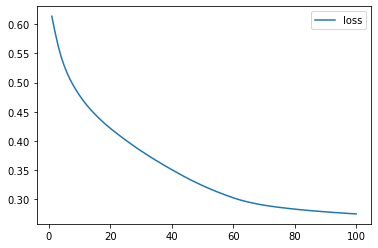

In [18]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

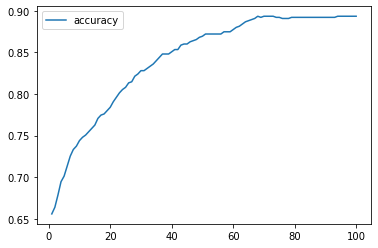

In [19]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [20]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [21]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [22]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 1s 2ms/step - loss: 0.5505 - accuracy: 0.8320
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 0.5183 - accuracy: 0.8707
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4886 - accuracy: 0.8680
Epoch 4/100
24/24 [==============================] - 0s 3ms/step - loss: 0.4622 - accuracy: 0.8680
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4381 - accuracy: 0.8680
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4169 - accuracy: 0.8680
Epoch 7/100
24/24 [==============================] - 0s 3ms/step - loss: 0.3980 - accuracy: 0.8680
Epoch 8/100
24/24 [==============================] - 0s 3ms/step - loss: 0.3809 - accuracy: 0.8680
Epoch 9/100
24/24 [==============================] - 0s 3ms/step - loss: 0.3663 - accuracy: 0.8693
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3533 - accuracy: 0.8693
Epoch 11/

24/24 [==============================] - 0s 2ms/step - loss: 0.2423 - accuracy: 0.8920
Epoch 84/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2418 - accuracy: 0.8920
Epoch 85/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2415 - accuracy: 0.8920
Epoch 86/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2410 - accuracy: 0.8920
Epoch 87/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2407 - accuracy: 0.8920
Epoch 88/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2404 - accuracy: 0.8920
Epoch 89/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2399 - accuracy: 0.8920
Epoch 90/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2394 - accuracy: 0.8933
Epoch 91/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2390 - accuracy: 0.8933
Epoch 92/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2386 - accuracy: 0.8933
Epoch 93/100


<AxesSubplot:>

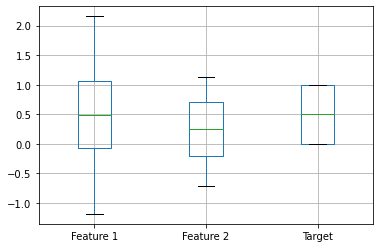

In [52]:
df_moons.boxplot()

In [64]:
df_moons_new = df_moons.loc[(df_moons["Feature 1"] < 1.5) & (df_moons["Feature 1"] > 0.5)]

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

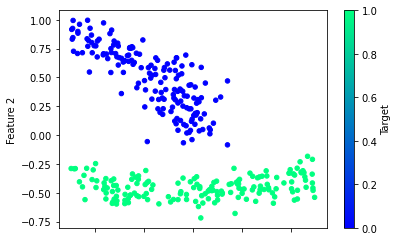

In [68]:
# Create Scatterplot of new data
df_moons_new.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [73]:
x_moons = df_moons_new["Feature 1"]
y_moons = df_moons_new["Feature 2"]

# Create training and testing sets
X_moon_train1, X_moon_test1, y_moon_train1, y_moon_test1 = train_test_split(
    X_moons, y_moons, random_state=78
)

ValueError: Found input variables with inconsistent numbers of samples: [1000, 331]

In [66]:
# Generate our new Sequential model
newest_model = tf.keras.models.Sequential()

In [67]:
newest_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
newest_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [ ]:
# Compile the Sequential model together and customize metrics
newest_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
newest_fit_model = newest_model.fit(X_moon_train1, y_moon_train1, epochs=100, shuffle=True)